## Library Imports and Configuration

In [40]:
# Importing required libraries for data handling and visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Advanced data visualization

# Importing machine learning libraries for preprocessing and model building
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Hyperparameter optimization
from sklearn.tree import DecisionTreeClassifier  # Decision tree model
from sklearn.ensemble import RandomForestClassifier  # Random forest model
from sklearn.svm import SVC  # Import SVC
from xgboost import XGBClassifier  # XGBoost model
import xgboost as xgb  # XGBoost library
from lightgbm import LGBMClassifier  # LightGBM model
import lightgbm as lgb  # LightGBM library
from sklearn.ensemble import GradientBoostingClassifier  # Gradient boosting model
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Importing performance metrics for model evaluation
from sklearn.metrics import roc_curve  # ROC curve computation
from sklearn.metrics import auc, make_scorer  # Area under curve calculation
from sklearn.metrics import confusion_matrix  # Confusion matrix computation
# Import performance metrics from sklearn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report # Summary report of precision, recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

In [41]:
# Configurations to suppress warnings and control logging
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings to clean up notebook output
warnings.simplefilter("ignore") # Suppress all warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Specific warning category to ignore
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore deprecation warnings
warnings.filterwarnings('ignore', module='sklearn')  # Suppress warnings from scikit-learn only
warnings.filterwarnings('ignore', message=".*model is deprecated.*") # Ignore warnings from specific messages

import logging
from sklearn import set_config
logging.getLogger('lightgbm').setLevel(logging.INFO)  # Set logging level for LightGBM
logging.getLogger('lightgbm').setLevel(logging.ERROR)  # Set logging level for LightGBM
logging.getLogger('sklearn').setLevel(logging.ERROR) # Suppress sklearn warnings globally

In [42]:
import os
os.environ["OMP_NUM_THREADS"] = "3"
os.environ["MKL_NUM_THREADS"] = "3"
print(os.getcwd())

/users/emmanuel/Msc


### Loading the datasets and Annotation File

In [43]:
# Load the gene level expression matrix eset_HTA20. 
hta_df = pd.read_csv("HTA20_RMA.xlsx", sep = " ")
hta_df.head()

,Tarca_001_P1A01,Tarca_003_P1A03,Tarca_004_P1A04,Tarca_005_P1A05,Tarca_006_P1A06,Tarca_007_P1A07,Tarca_008_P1A08,Tarca_011_P1A11,Tarca_012_P1A12,Tarca_013_P1B01,...,Tarca_911_P10G06,Tarca_912_P10H06,Tarca_913_P10A07,Tarca_914_P10B07,Tarca_915_P10C07,Tarca_916_P10D07,Tarca_917_P10E07,Tarca_918_P10F07,Tarca_919_P10G07,Tarca_920_P10H07
1_at,6.062215,6.125023,5.875502,6.126131,6.146466,6.134555,6.289534,6.320997,6.185504,6.085618,...,6.123887,6.092937,6.374775,6.199526,6.244360,6.277895,6.365038,6.341189,6.433980,6.254807
10_at,3.796484,3.805305,3.450245,3.628411,3.446812,3.512325,3.568193,3.584622,3.696258,3.549118,...,3.642128,3.543872,4.165844,3.725332,3.536598,3.708818,3.773754,3.970478,3.749549,3.599263
100_at,5.849338,6.191562,6.550525,6.421877,6.260962,6.154893,6.348074,6.175742,6.179713,6.117801,...,6.216938,6.161236,6.371440,6.181719,6.195250,6.276257,6.221597,6.186570,6.213764,6.329449
1000_at,3.567779,3.452524,3.316134,3.432451,3.477162,3.638140,3.399044,3.787394,3.452014,3.542147,...,3.579528,3.509152,3.654649,3.760908,3.601202,3.763030,3.775920,3.712024,3.769967,3.718142
10000_at,6.166815,5.678373,6.185059,5.633757,5.313198,5.148149,5.640643,5.270906,5.694625,6.257552,...,5.733829,5.913966,5.650307,5.630868,5.488366,5.424940,5.350965,5.605535,5.379500,5.513927


In [44]:
hta_df.shape

(32830, 735)

In [45]:
#Loading the the gene level expression matrix esetHuGene21ST (29,635 rows x 326 columns) for dataset GSE59491
gsm_df = pd.read_csv("GSM_train.csv")

In [46]:
gsm_df.head()

,Unnamed: 0,GSM1437801,GSM1437802,GSM1437803,GSM1437804,GSM1437805,GSM1437806,GSM1437807,GSM1437808,GSM1437809,...,GSM1438117,GSM1438118,GSM1438119,GSM1438120,GSM1438121,GSM1438122,GSM1438123,GSM1438124,GSM1438125,GSM1438126
0,1_at,4.865497,4.873023,4.786624,4.366512,4.627092,5.022471,5.001928,5.292825,4.547198,...,5.446590,5.021293,4.711062,4.704052,4.469233,4.664661,4.962359,4.674659,4.587906,4.821703
1,10_at,2.454080,3.124465,2.814248,2.479630,2.555347,2.434593,2.378920,2.234354,2.488600,...,2.257441,2.343328,2.268315,2.581067,2.558224,2.570164,2.643409,2.327913,2.494115,2.370691
2,100_at,7.977459,7.841581,8.605167,8.450711,7.896053,8.148322,8.262210,8.395612,8.200204,...,8.248806,8.301371,7.965852,8.316221,8.494200,8.510477,8.616120,8.483724,8.831870,8.373812
3,1000_at,4.163376,4.317975,3.846657,4.210707,4.321997,4.185616,3.919003,3.970493,4.415479,...,3.454188,4.134260,4.108867,3.966018,3.838453,3.484688,3.934110,3.903856,3.992998,3.987127
4,10000_at,7.117694,7.306302,7.046300,7.115633,6.695250,6.680977,7.018231,6.880931,6.775556,...,7.276332,6.933368,6.714113,6.905420,6.996540,7.504992,7.144397,7.044756,6.735834,6.761954


In [47]:
gsm_df.shape

(29635, 327)

In [48]:
#Reset the index to 'Unnamed: 0' ... Ths will ensure that this set of train datasets have the same index as those in hta_df
gsm_df1= gsm_df.set_index('Unnamed: 0') # This will allow us to use the index as refrence for merging the datasets.
gsm_df1.head()

,GSM1437801,GSM1437802,GSM1437803,GSM1437804,GSM1437805,GSM1437806,GSM1437807,GSM1437808,GSM1437809,GSM1437810,...,GSM1438117,GSM1438118,GSM1438119,GSM1438120,GSM1438121,GSM1438122,GSM1438123,GSM1438124,GSM1438125,GSM1438126
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1_at,4.865497,4.873023,4.786624,4.366512,4.627092,5.022471,5.001928,5.292825,4.547198,4.713176,...,5.446590,5.021293,4.711062,4.704052,4.469233,4.664661,4.962359,4.674659,4.587906,4.821703
10_at,2.454080,3.124465,2.814248,2.479630,2.555347,2.434593,2.378920,2.234354,2.488600,2.456773,...,2.257441,2.343328,2.268315,2.581067,2.558224,2.570164,2.643409,2.327913,2.494115,2.370691
100_at,7.977459,7.841581,8.605167,8.450711,7.896053,8.148322,8.262210,8.395612,8.200204,8.639295,...,8.248806,8.301371,7.965852,8.316221,8.494200,8.510477,8.616120,8.483724,8.831870,8.373812
1000_at,4.163376,4.317975,3.846657,4.210707,4.321997,4.185616,3.919003,3.970493,4.415479,4.226394,...,3.454188,4.134260,4.108867,3.966018,3.838453,3.484688,3.934110,3.903856,3.992998,3.987127
10000_at,7.117694,7.306302,7.046300,7.115633,6.695250,6.680977,7.018231,6.880931,6.775556,6.608307,...,7.276332,6.933368,6.714113,6.905420,6.996540,7.504992,7.144397,7.044756,6.735834,6.761954


In [49]:
#Merge the two datasets to obatin a comphresive dataset "data"
data = hta_df.merge(gsm_df1, left_index=True, right_index=True, how="inner")

In [50]:
data

,Tarca_001_P1A01,Tarca_003_P1A03,Tarca_004_P1A04,Tarca_005_P1A05,Tarca_006_P1A06,Tarca_007_P1A07,Tarca_008_P1A08,Tarca_011_P1A11,Tarca_012_P1A12,Tarca_013_P1B01,...,GSM1438117,GSM1438118,GSM1438119,GSM1438120,GSM1438121,GSM1438122,GSM1438123,GSM1438124,GSM1438125,GSM1438126
1_at,6.062215,6.125023,5.875502,6.126131,6.146466,6.134555,6.289534,6.320997,6.185504,6.085618,...,5.446590,5.021293,4.711062,4.704052,4.469233,4.664661,4.962359,4.674659,4.587906,4.821703
10_at,3.796484,3.805305,3.450245,3.628411,3.446812,3.512325,3.568193,3.584622,3.696258,3.549118,...,2.257441,2.343328,2.268315,2.581067,2.558224,2.570164,2.643409,2.327913,2.494115,2.370691
100_at,5.849338,6.191562,6.550525,6.421877,6.260962,6.154893,6.348074,6.175742,6.179713,6.117801,...,8.248806,8.301371,7.965852,8.316221,8.494200,8.510477,8.616120,8.483724,8.831870,8.373812
1000_at,3.567779,3.452524,3.316134,3.432451,3.477162,3.638140,3.399044,3.787394,3.452014,3.542147,...,3.454188,4.134260,4.108867,3.966018,3.838453,3.484688,3.934110,3.903856,3.992998,3.987127
10000_at,6.166815,5.678373,6.185059,5.633757,5.313198,5.148149,5.640643,5.270906,5.694625,6.257552,...,7.276332,6.933368,6.714113,6.905420,6.996540,7.504992,7.144397,7.044756,6.735834,6.761954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991_at,9.700440,9.271577,9.470850,9.374321,9.267968,9.626822,9.270385,9.367872,9.321996,9.633982,...,11.258341,11.346868,11.374917,11.381557,11.328234,11.303358,11.209462,11.341351,11.455903,11.355943
9992_at,3.771009,3.838563,3.568739,3.691639,3.758960,3.775041,3.726264,3.857164,3.706270,3.653025,...,2.662402,2.860640,3.068664,3.107949,3.090471,2.889210,2.849657,3.041607,3.307009,3.020891
9993_at,8.227688,8.083417,7.983239,8.270554,8.012785,8.575628,7.972229,8.241322,7.888280,8.120547,...,9.948764,10.306209,10.345557,10.058155,10.126526,10.128585,9.829649,9.972865,10.181318,10.089825
9994_at,5.992462,5.826221,6.175550,5.635078,5.740465,5.628403,5.994099,5.897324,6.117054,6.226442,...,7.624515,7.132689,7.364539,7.482933,7.350082,7.966744,7.793764,7.324079,6.918412,7.584111


In [51]:
# Load the sample annotation file i.e Dataset Key.. 
dataset_key = pd.read_csv("anoSC2_v20_nokey.csv")

In [52]:
dataset_key.shape

(739, 9)

###  Dataset Preparation
Only samples stated in the annotation file (i.e Dataset Key)"anoSC2_v20_nokey.csv"  will be used in our dataset.
In order to ensure that only samples in dataset key are selected from the data, we shall now follow the following steps. 

In [53]:
# Get the list of SampleIDs where Train is 1 
Valid_train_IDS = dataset_key.loc[dataset_key["Train"] == 1, "SampleID"]
# Ensure that you select from "data" only columns that exist in dataset_Key
IDS_in_key = Valid_train_IDS[Valid_train_IDS.isin(data.columns)]
#Create a datframe of only those samples whose ID is in datakey provided.. 
data_df = data[IDS_in_key]
data_df.head()

,GSM1437802,GSM1437801,GSM1437804,GSM1437803,GSM1437806,GSM1437805,GSM1437808,GSM1437807,GSM1437810,GSM1437809,...,Tarca_597_P7E03,Tarca_641_P7A09,Tarca_492_P6D02,Tarca_491_P6C02,Tarca_506_P6B04,Tarca_920_P10H07,Tarca_919_P10G07,Tarca_918_P10F07,Tarca_917_P10E07,Tarca_916_P10D07
1_at,4.873023,4.865497,4.366512,4.786624,5.022471,4.627092,5.292825,5.001928,4.713176,4.547198,...,6.199299,6.334521,5.670749,5.875766,6.112121,6.254807,6.433980,6.341189,6.365038,6.277895
10_at,3.124465,2.454080,2.479630,2.814248,2.434593,2.555347,2.234354,2.378920,2.456773,2.488600,...,3.706720,3.836938,3.227989,3.554173,3.521487,3.599263,3.749549,3.970478,3.773754,3.708818
100_at,7.841581,7.977459,8.450711,8.605167,8.148322,7.896053,8.395612,8.262210,8.639295,8.200204,...,6.179244,6.152893,6.369151,6.495599,6.481665,6.329449,6.213764,6.186570,6.221597,6.276257
1000_at,4.317975,4.163376,4.210707,3.846657,4.185616,4.321997,3.970493,3.919003,4.226394,4.415479,...,3.514861,3.604500,3.437909,3.455021,3.520653,3.718142,3.769967,3.712024,3.775920,3.763030
10000_at,7.306302,7.117694,7.115633,7.046300,6.680977,6.695250,6.880931,7.018231,6.608307,6.775556,...,5.053029,5.249306,6.073804,6.075164,5.661452,5.513927,5.379500,5.605535,5.350965,5.424940


In [54]:
#merge the dataset "data_df" with the dataset Key based on sample IDS 
# Set SampleID as the index in dataset_key
dataset_key.set_index('SampleID', inplace=True)

# Transpose data_df and merge with dataset_key
data_with_key = data_df.transpose().merge(dataset_key, left_index=True, right_index=True, how="inner")

data_with_key.head()

,1_at,10_at,100_at,1000_at,10000_at,100009613_at,100009676_at,10001_at,10002_at,10003_at,...,9994_at,9997_at,IndividualID,GA,GADel,Group,Set,Train,Platform,TTD
GSM1437802,4.873023,3.124465,7.841581,4.317975,7.306302,3.889792,7.116418,7.934444,3.938398,2.162576,...,7.967755,7.308521,515122,28.0,40.0,Control,GSE59491,1,HG21ST,12.0
GSM1437801,4.865497,2.454080,7.977459,4.163376,7.117694,3.195365,6.923813,7.705731,4.337360,2.457066,...,7.420243,7.366170,515122,19.0,40.0,Control,GSE59491,1,HG21ST,21.0
GSM1437804,4.366512,2.479630,8.450711,4.210707,7.115633,3.390626,6.928906,7.920388,4.051784,2.547550,...,7.655429,6.665448,810384,28.0,40.0,Control,GSE59491,1,HG21ST,12.0
GSM1437803,4.786624,2.814248,8.605167,3.846657,7.046300,2.991461,7.028040,7.790158,4.319769,2.276823,...,7.527143,6.837073,810384,18.0,40.0,Control,GSE59491,1,HG21ST,22.0
GSM1437806,5.022471,2.434593,8.148322,4.185616,6.680977,3.420477,6.673671,7.713025,4.276860,2.097956,...,7.096773,7.262304,810392,28.0,41.0,Control,GSE59491,1,HG21ST,13.0


In [55]:
data_with_key

,1_at,10_at,100_at,1000_at,10000_at,100009613_at,100009676_at,10001_at,10002_at,10003_at,...,9994_at,9997_at,IndividualID,GA,GADel,Group,Set,Train,Platform,TTD
GSM1437802,4.873023,3.124465,7.841581,4.317975,7.306302,3.889792,7.116418,7.934444,3.938398,2.162576,...,7.967755,7.308521,515122,28.0,40.00,Control,GSE59491,1,HG21ST,12.0
GSM1437801,4.865497,2.454080,7.977459,4.163376,7.117694,3.195365,6.923813,7.705731,4.337360,2.457066,...,7.420243,7.366170,515122,19.0,40.00,Control,GSE59491,1,HG21ST,21.0
GSM1437804,4.366512,2.479630,8.450711,4.210707,7.115633,3.390626,6.928906,7.920388,4.051784,2.547550,...,7.655429,6.665448,810384,28.0,40.00,Control,GSE59491,1,HG21ST,12.0
GSM1437803,4.786624,2.814248,8.605167,3.846657,7.046300,2.991461,7.028040,7.790158,4.319769,2.276823,...,7.527143,6.837073,810384,18.0,40.00,Control,GSE59491,1,HG21ST,22.0
GSM1437806,5.022471,2.434593,8.148322,4.185616,6.680977,3.420477,6.673671,7.713025,4.276860,2.097956,...,7.096773,7.262304,810392,28.0,41.00,Control,GSE59491,1,HG21ST,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tarca_920_P10H07,6.254807,3.599263,6.329449,3.718142,5.513927,4.799670,5.786147,5.912813,4.794894,2.638680,...,5.619030,7.483330,27755,30.0,30.29,sPTD,PRB_HTA,1,HTA20,0.3
Tarca_919_P10G07,6.433980,3.749549,6.213764,3.769967,5.379500,4.702771,6.341635,5.630483,5.081581,2.768239,...,5.667191,7.542290,27755,28.1,30.29,sPTD,PRB_HTA,1,HTA20,2.2
Tarca_918_P10F07,6.341189,3.970478,6.186570,3.712024,5.605535,4.955071,6.078098,5.797294,4.819776,2.662060,...,5.759987,7.486573,27755,26.1,30.29,sPTD,PRB_HTA,1,HTA20,4.2
Tarca_917_P10E07,6.365038,3.773754,6.221597,3.775920,5.350965,5.047696,6.233094,5.556679,4.806731,2.731038,...,5.602169,7.599404,27755,24.0,30.29,sPTD,PRB_HTA,1,HTA20,6.3


In [56]:
data_with_key.shape

(435, 29467)

In [57]:
#checking for missing values in the dataset
data_with_key.isnull().sum()

1_at        0
10_at       0
100_at      0
1000_at     0
10000_at    0
           ..
Group       0
Set         0
Train       0
Platform    0
TTD         0
Length: 29467, dtype: int64

In [58]:
# Remove duplicate rows from the training data to ensure that the model learns from unique examples
data_with_key = data_with_key.drop_duplicates()

# Print the new shape of the training data after cleaning to confirm the changes
print("shape of the data :", data_with_key.shape)

shape of the data : (435, 29467)


Group
Control    285
PPROM       95
sPTD        55
Name: count, dtype: int64


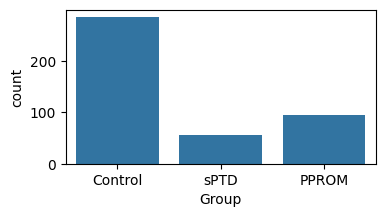

In [59]:
# Display the distribution of the target variable 'Group'
print(data_with_key['Group'].value_counts())

# Set the figure size
plt.figure(figsize=(4,2))
# Create a count plot to visualize the number of observations for each 'Group' class,
sns.countplot(x='Group', data=data_with_key)

# Display the plot
plt.show()

## Preparing Data for modeling

### Splitting Dataset

In [60]:
#The index (representing different sampleIDs) often does not serve as a feature for predictive models 
# We shall therefore drop it from our dataset. 

data_with_key = data_with_key.reset_index(drop=True)  # Drop the index

print("shape of the our data :", data_with_key.shape ) #To confirm that it doesnt change the shape of our datasets.

shape of the our data : (435, 29467)


In [61]:
X = data_with_key.drop(columns=['IndividualID','GA','GADel','Group','Set','Train','Platform','TTD'])
y = data_with_key['Group']

In [62]:
X.head()

,1_at,10_at,100_at,1000_at,10000_at,100009613_at,100009676_at,10001_at,10002_at,10003_at,...,9987_at,9988_at,9989_at,999_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at
0,4.873023,3.124465,7.841581,4.317975,7.306302,3.889792,7.116418,7.934444,3.938398,2.162576,...,10.140315,9.806943,10.127010,5.766303,10.940417,11.098387,3.053534,10.279052,7.967755,7.308521
1,4.865497,2.454080,7.977459,4.163376,7.117694,3.195365,6.923813,7.705731,4.337360,2.457066,...,9.553146,9.304134,10.364049,6.928753,11.058097,11.385048,2.668465,10.258012,7.420243,7.366170
2,4.366512,2.479630,8.450711,4.210707,7.115633,3.390626,6.928906,7.920388,4.051784,2.547550,...,10.002533,9.349997,10.064581,6.280449,10.915911,11.246241,2.792030,10.091671,7.655429,6.665448
3,4.786624,2.814248,8.605167,3.846657,7.046300,2.991461,7.028040,7.790158,4.319769,2.276823,...,10.066194,9.497438,9.917653,5.970615,10.833824,11.225455,3.076462,10.023860,7.527143,6.837073
4,5.022471,2.434593,8.148322,4.185616,6.680977,3.420477,6.673671,7.713025,4.276860,2.097956,...,9.383400,9.143473,9.776344,7.394728,10.834272,11.207113,3.742716,10.189299,7.096773,7.262304


In [63]:
y

0      Control
1      Control
2      Control
3      Control
4      Control
        ...   
430       sPTD
431       sPTD
432       sPTD
433       sPTD
434       sPTD
Name: Group, Length: 435, dtype: object

In [64]:
# Import the LabelEncoder from sklearn for encoding categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Fit the LabelEncoder to the target variable and transform it to a numeric format
y = labelencoder.fit_transform(y)

In [65]:
from sklearn.model_selection import train_test_split

def augment_data(X, y, augmentation_factor=1.0, batch_size=1000):
    """Augment the dataset by adding small variations to the gene expression levels."""
    # Calculate mean and standard deviation for each feature
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    # Total augmented samples to create
    total_augmented = int(augmentation_factor * len(X))
    
    augmented_X = []
    augmented_y = []

    # Loop to generate augmented data
    for _ in range(total_augmented // batch_size + 1):
        current_batch_size = min(batch_size, total_augmented - len(augmented_X) * batch_size)
        if current_batch_size <= 0:
            break
        
        # Create a batch of new data points
        batch_noise = np.random.normal(0, stds * 0.1, size=(current_batch_size, X.shape[1]))
        new_data = X[:current_batch_size] + batch_noise  # X is already a NumPy array
        augmented_X.append(new_data)
        augmented_y.append(y[:current_batch_size])  # y is also a NumPy array

    return np.vstack(augmented_X), np.concatenate(augmented_y)

# Initial Split: You split the data into training (70%) and test (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Data augmentation on training data
X_augmented, y_augmented = augment_data(X_train, y_train, augmentation_factor=1.0)  # Adjust factor as needed
X_train = np.vstack((X_train, X_augmented))  # X_train is already a NumPy array
y_train = np.concatenate((y_train, y_augmented))  # y_train is also a NumPy array

# Further split the training data into training (80% of the 70%) and validation (20% of the 70%) sets.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the datasets to confirm the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}, X_val shape: {X_val.shape}, y_val shape: {y_val.shape}, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (486, 29459), y_train shape: (486,), X_val shape: (122, 29459), y_val shape: (122,), X_test shape: (131, 29459), y_test shape: (131,)


## Model Training and Evaluation

In [66]:
#Normalization of Expression Data
# Scaling the features for models like SVM that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert X_train and X_val to DataFrame to include feature names as feature names are required by LGBMClassifier
feature_columns = X.columns  
X_train_df = pd.DataFrame(X_train, columns=feature_columns)
X_val_df = pd.DataFrame(X_val, columns=feature_columns)


In [42]:
# Dictionary of machine learning models for multi-class classification
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(eval_metric='mlogloss', verbosity=1),
    'LGBMClassifier': LGBMClassifier(verbosity=-1),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)  # Enable probability estimates
}

param_grids = {
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LGBMClassifier': {
        'n_estimators': [100, 200],
        'max_depth': [3, 4], 
        'learning_rate': [0.1, 0.2],
    },
    'GradientBoostingClassifier': {
        'n_estimators': [400, 500, 600],
        'learning_rate': [0.2, 0.3, 0.4],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }
}
# Dictionary to store performance metrics for each model
model_metrics = {}

# Dictionary to store loss curves for each model
loss_curves = {}

# Dictionary to store confusion matrices for each model
confusion_matrices = {}

# Dictionary to store ROC curve data for each model
roc_curves = {}

# Dictionary to store the best models after tuning
best_models = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name} with hyperparameter tuning...")
    
    # Choose the appropriate parameter grid
    param_grid = param_grids.get(name, {})
    
    # Set up GridSearchCV
    search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1, verbose=1)
    
    # Use scaled data for SVM, otherwise use unscaled data
    if name == 'SVM':
        X_train_data = X_train_scaled  # Use scaled data for SVM
        X_val_data = X_val_scaled
    elif name == 'LGBMClassifier':
        X_train_data = X_train_df  # Use DataFrame with feature names for LGBM
        X_val_data = X_val_df
    else:
        X_train_data = X_train  # Use unscaled data for other models
        X_val_data = X_val
    
    # Train the model using GridSearchCV
    search.fit(X_train_data, y_train)
    
    # Store the best model
    best_models[name] = search.best_estimator_
    
    # Predict on the validation set
    val_preds = best_models[name].predict(X_val_data)
    
    # Get probability estimates for each class (required for AUC calculation)
    val_probs = best_models[name].predict_proba(X_val_data)
    
    # Calculate accuracy for the validation set
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Calculate the AUC score using the One-vs-Rest scheme for multi-class scenarios
    val_roc_auc = roc_auc_score(y_val, val_probs, multi_class='ovr', average='weighted')
    
    # Store accuracy and AUC in the metrics dictionary
    model_metrics[name] = {
        'Best Params': search.best_params_,
        'Accuracy': val_accuracy,
        'ROC AUC': val_roc_auc
    }
    
    # Output a classification report for each model
    print(f"{name} Classification Report:")
    print(classification_report(y_val, val_preds))
    
    # Capture loss curves for models that support it
    if name in ['XGBClassifier', 'LGBMClassifier', 'GradientBoostingClassifier']:
        print(f"Capturing loss curves for {name}...")
        
        # Train the best model with eval_set to capture training and validation loss
        if name == 'XGBClassifier':
            best_models[name].fit(X_train_data, y_train, eval_set=[(X_train_data, y_train), (X_val_data, y_val)], 
                           verbose=False)
            results = best_models[name].evals_result()
            train_loss = results['validation_0']['mlogloss']
            val_loss = results['validation_1']['mlogloss']

        elif name == 'LGBMClassifier':
            best_models[name].fit(X_train_df, y_train, eval_set=[(X_train_df, y_train), (X_val_df, y_val)], 
                           eval_metric='multi_logloss')
            results = best_models[name].evals_result_
            train_loss = results['training']['multi_logloss']
            val_loss = results['valid_1']['multi_logloss']

        elif name == 'GradientBoostingClassifier':
            best_models[name].fit(X_train_data, y_train)
            train_loss = best_models[name].train_score_
            val_loss = []  # GradientBoostingClassifier does not provide validation loss by default
        
        # Store loss curves
        loss_curves[name] = {
            'Training Loss': train_loss,
            'Validation Loss': val_loss
        }
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_val, val_preds)
    confusion_matrices[name] = cm
    
    # Compute and store ROC curve data
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(np.unique(y_val))
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val == i, val_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    roc_curves[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }

# Convert the metrics dictionary to a DataFrame for easy viewing
metrics_df = pd.DataFrame(model_metrics).T

# Print the DataFrame containing accuracy and AUC for each model
print(metrics_df)

Training DecisionTree with hyperparameter tuning...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        76
           1       0.57      0.69      0.62        29
           2       0.50      0.47      0.48        17

    accuracy                           0.74       122
   macro avg       0.65      0.66      0.65       122
weighted avg       0.75      0.74      0.74       122

Training RandomForest with hyperparameter tuning...
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        76
           1       0.92      0.79      0.85        29
           2       1.00      0.76      0.87        17

    accuracy                           0.92       122
   macro avg       0.94      0.85      0.89   

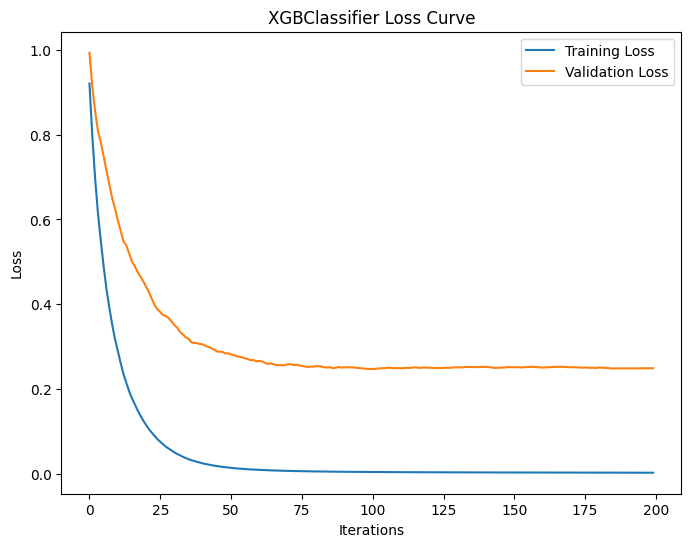

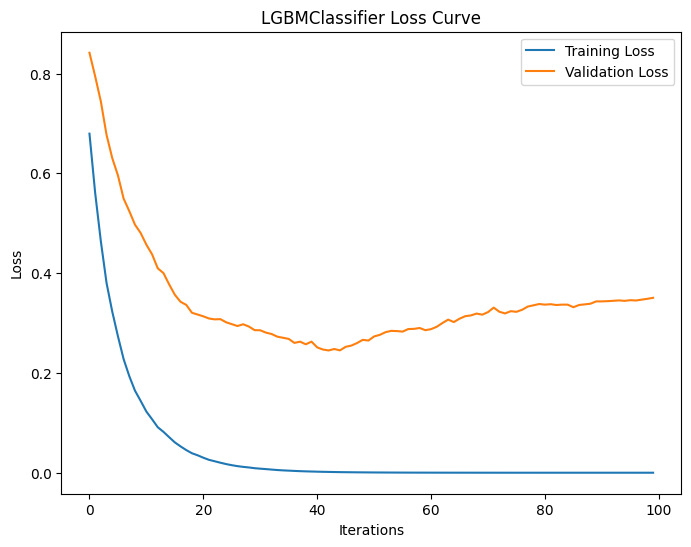

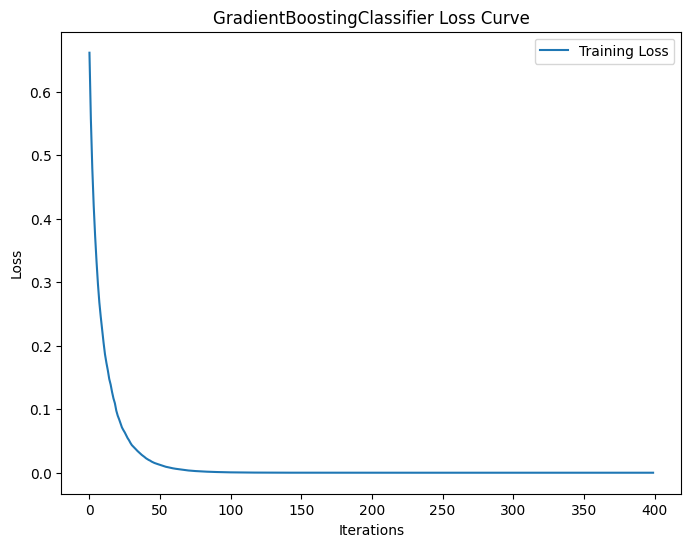

In [43]:
# Plot loss curves after capturing all metrics
for name, losses in loss_curves.items():
    plt.figure(figsize=(8, 6))
    plt.plot(losses['Training Loss'], label='Training Loss')
    if losses['Validation Loss']:
        plt.plot(losses['Validation Loss'], label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'{name} Loss Curve')
    plt.legend()
    plt.show()

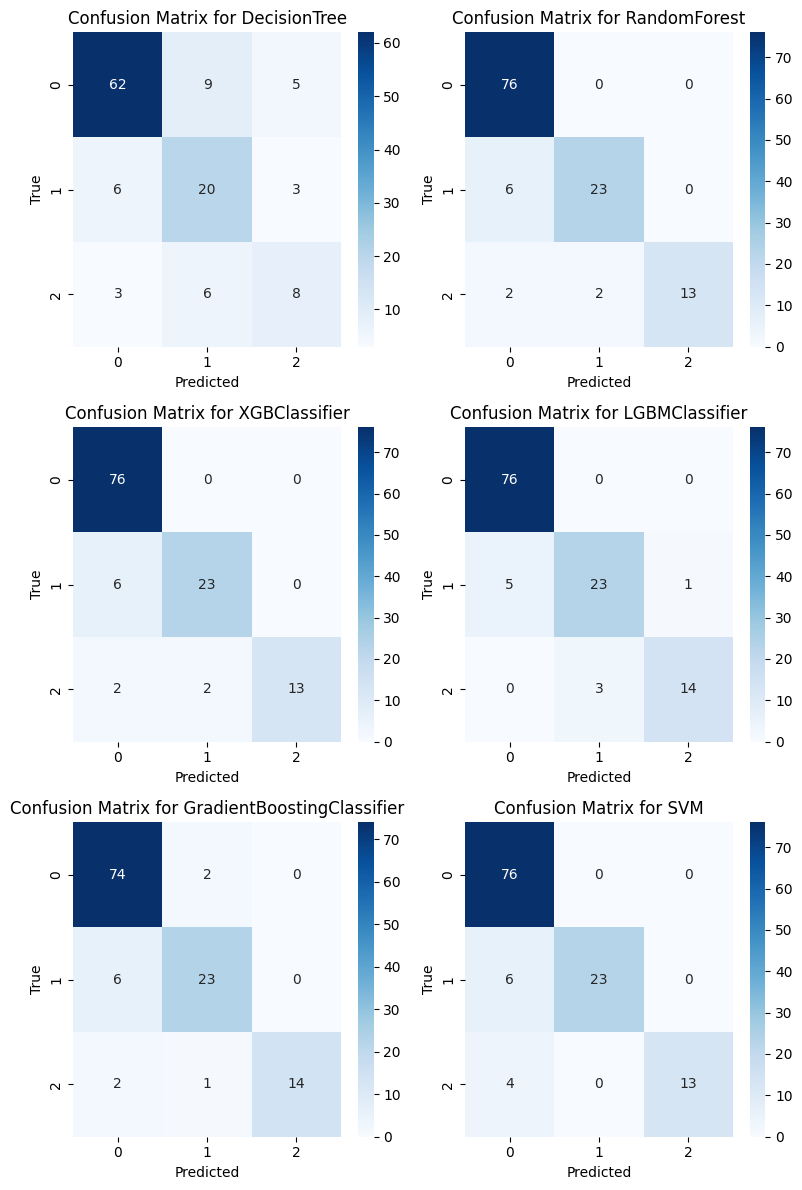

In [44]:
from sklearn.metrics import confusion_matrix

# Determine number of rows needed (ceil of total models divided by 2 for two columns)
n_models = len(confusion_matrices)
n_rows = (n_models + 1) // 2  # For an odd number of models, it will create one extra row

# Create the figure with a grid of subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(8, 4 * n_rows))

# Flatten the axes array to easily iterate through
axes = axes.flatten()

# Iterate over each model's confusion matrix
for i, (name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i]  # Get the current axis
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), 
                yticklabels=np.unique(y_val), ax=ax)
    ax.set_title(f"Confusion Matrix for {name}")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# If there's an odd number of models, remove extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide the empty subplots

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


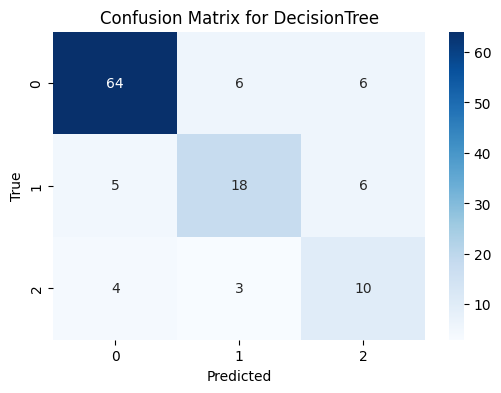

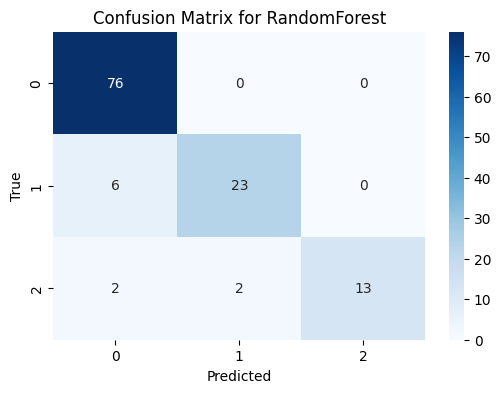

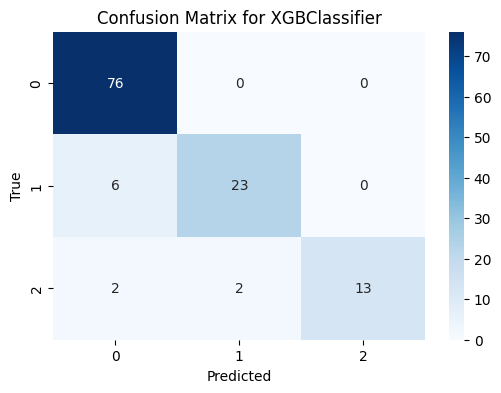

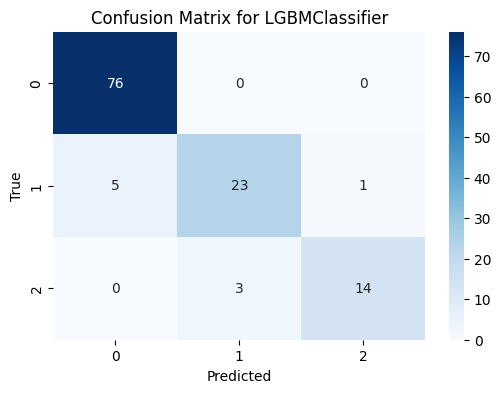

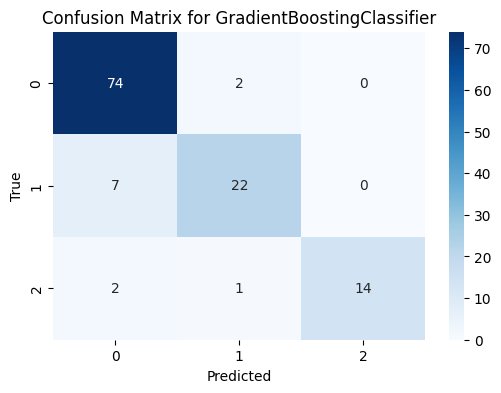

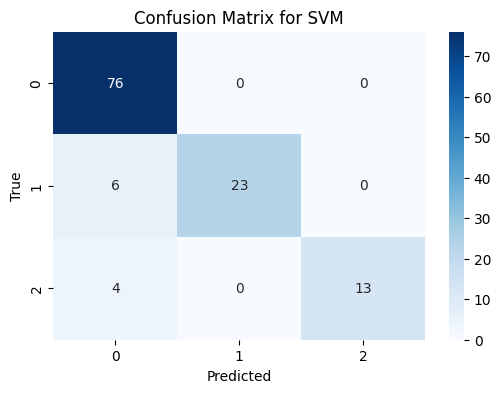

In [31]:
from sklearn.metrics import confusion_matrix

# After your model evaluation loop, this will plot confusion matrices for each model
for name, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


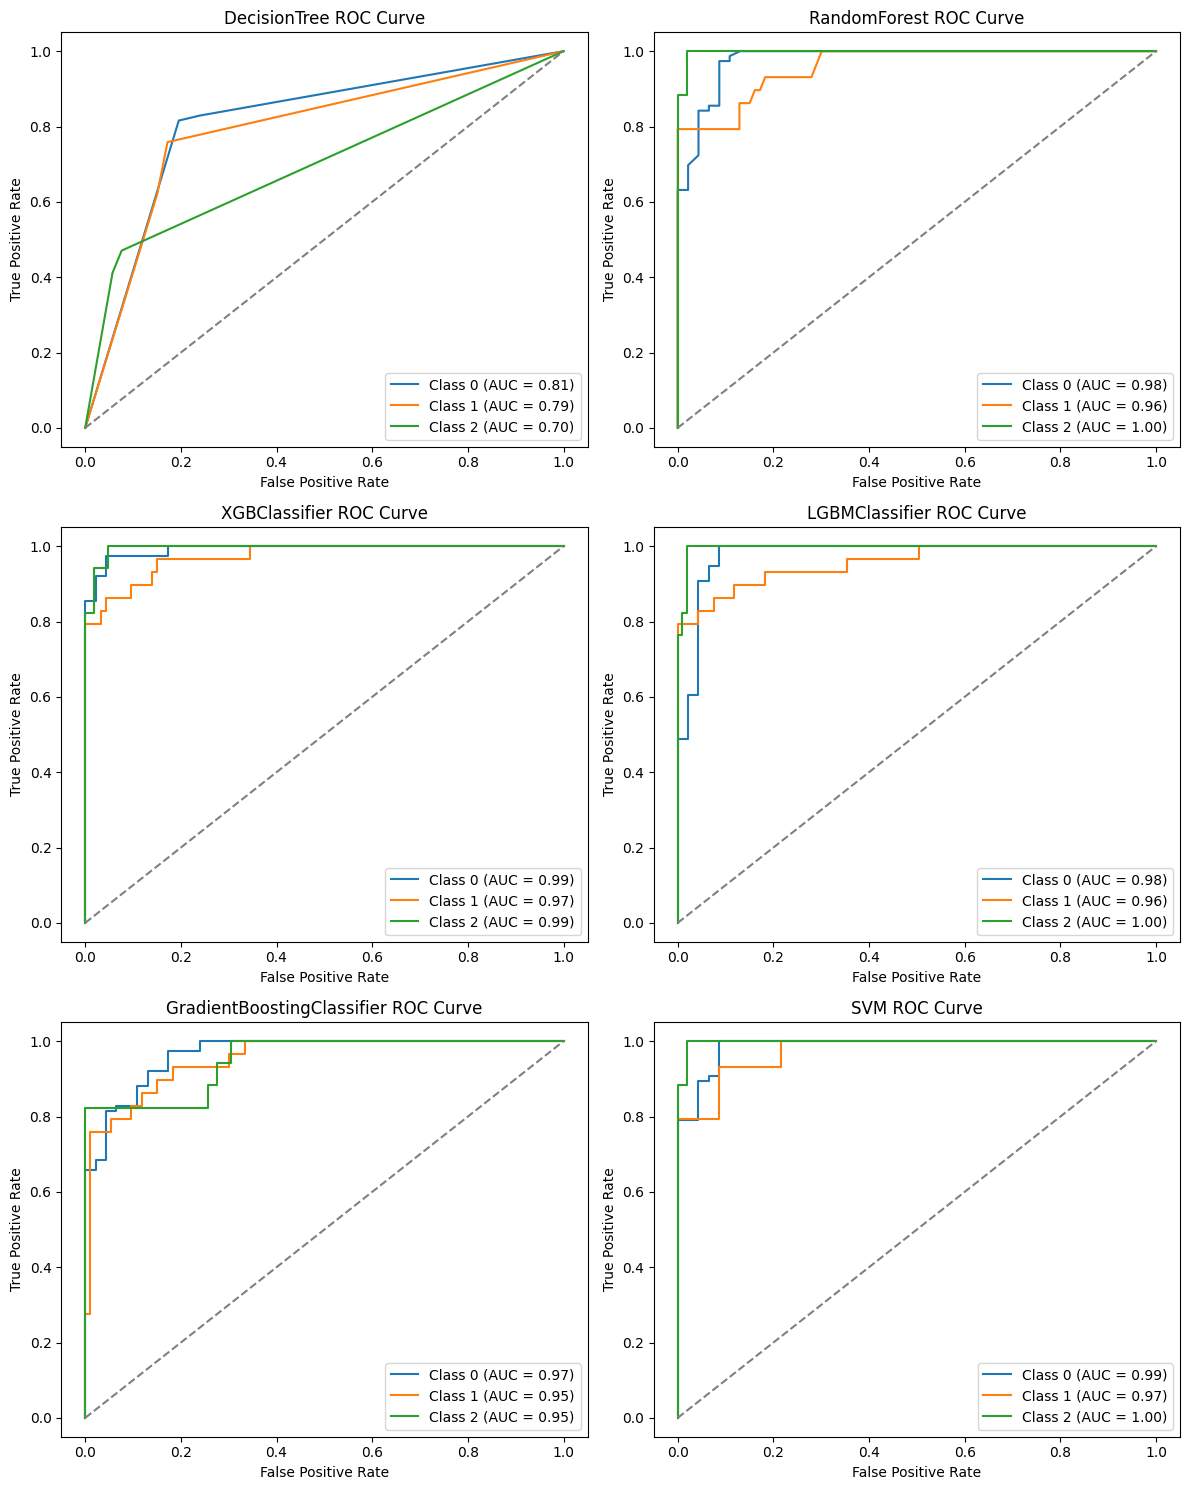

In [45]:
# Calculate grid dimensions dynamically
n_curves = len(roc_curves)
n_cols = 2
n_rows = int(np.ceil(n_curves / n_cols))

# Plot ROC curves in a grid-like form
plt.figure(figsize=(n_cols * 6, n_rows * 5))  # Adjust figure size based on grid
for i, (name, roc_data) in enumerate(roc_curves.items()):
    plt.subplot(n_rows, n_cols, i + 1)
    for j in range(len(roc_data['fpr'])):
        plt.plot(roc_data['fpr'][j], roc_data['tpr'][j], 
                 label=f'Class {j} (AUC = {roc_data["roc_auc"][j]:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Neural Network Training and Evaluation
we implement and train multiple neural network architectures using TensorFlow and Keras to handle the multi-class classification task. We evaluate each model based on their accuracy and the Area Under the Curve (AUC) on a validation set.

Training NN_Shallow...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
NN_Shallow Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        76
           1       1.00      0.52      0.68        29
           2       0.42      1.00      0.60        17

    accuracy                           0.78       122
   macro avg       0.79      0.78      0.72       122
weighted avg       0.88      0.78      0.79       122



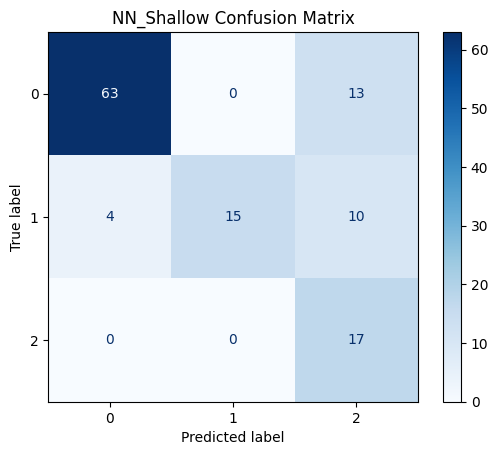

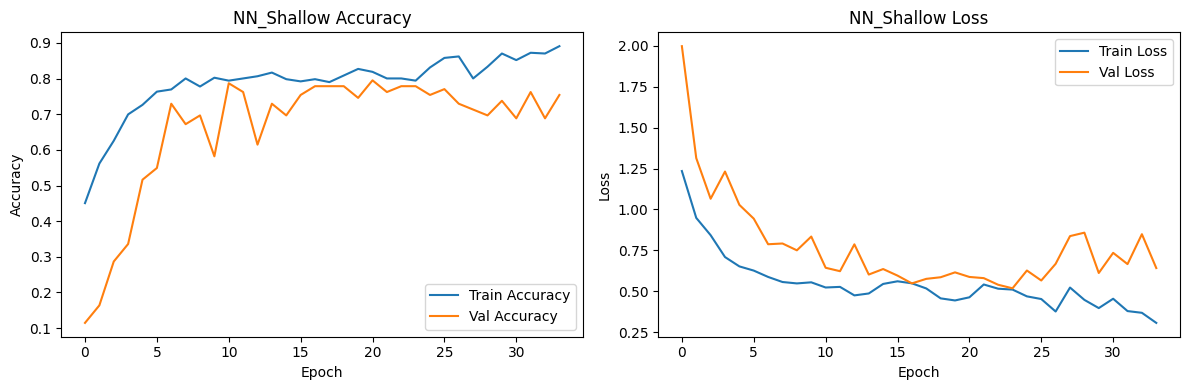

Training NN_Medium...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 
NN_Medium Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        76
           1       1.00      0.52      0.68        29
           2       0.46      1.00      0.63        17

    accuracy                           0.80       122
   macro avg       0.80      0.79      0.73       122
weighted avg       0.88      0.80      0.80       122



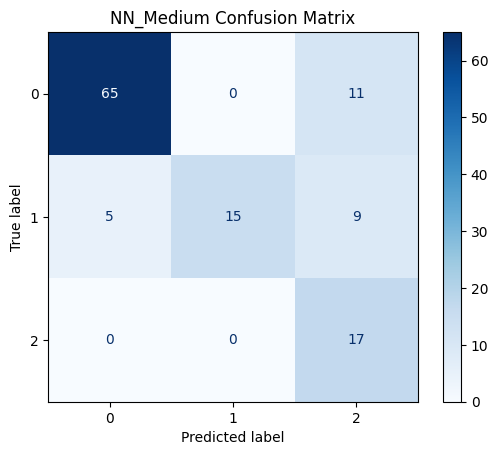

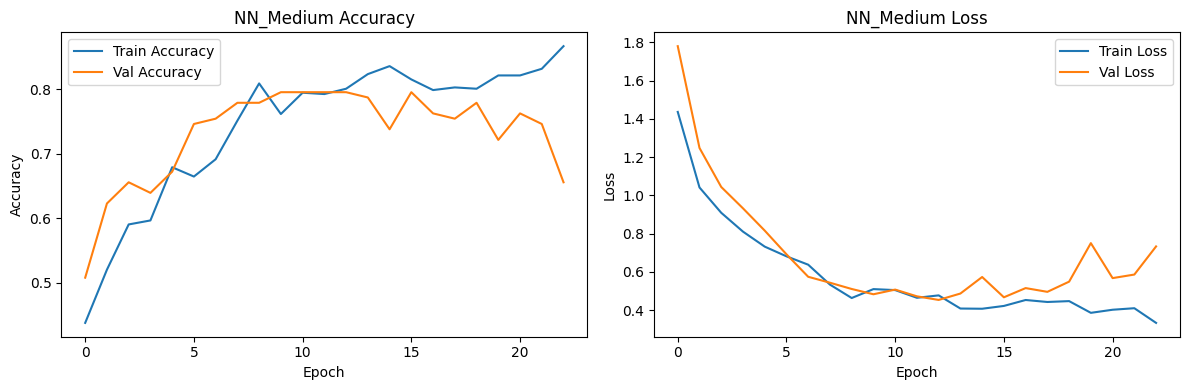

Training NN_Deep...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 
NN_Deep Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        76
           1       0.79      0.76      0.77        29
           2       0.88      0.88      0.88        17

    accuracy                           0.86       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.86      0.86      0.86       122



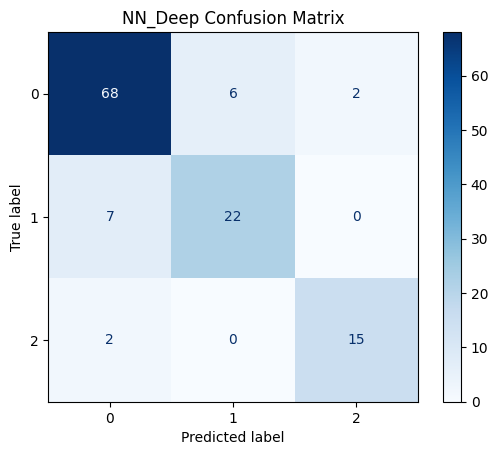

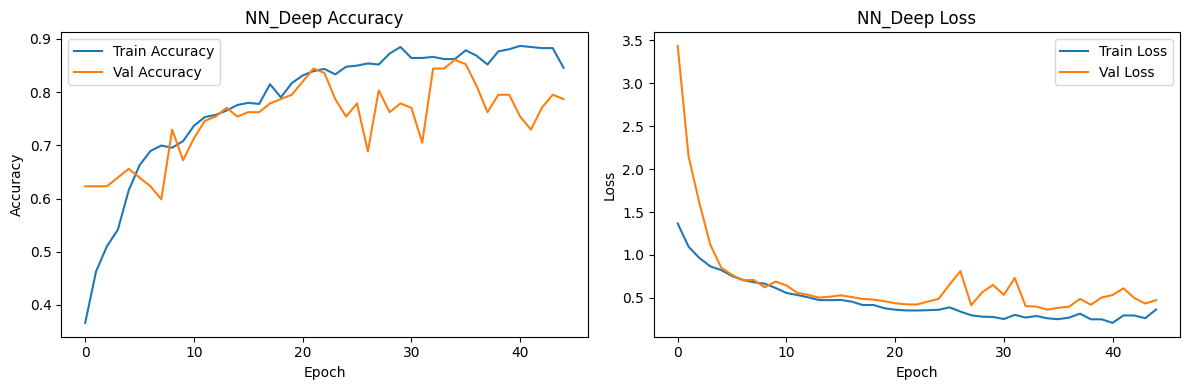

            Accuracy   ROC AUC
NN_Shallow  0.778689  0.927787
NN_Medium   0.795082  0.923392
NN_Deep     0.860656  0.946448


In [87]:
from itertools import cycle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

nn_architectures = {
    'NN_Shallow': [8, 8],
    'NN_Medium': [64, 32, 16],
    'NN_Deep': [128, 64, 32, 16]
}

model_metrics = {}
trained_models = {}

for name, layers in nn_architectures.items():
    print(f"Training {name}...")
    
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        else:
            model.add(Dense(nodes, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.1))
    
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=100,
        callbacks=[early_stopping],
        class_weight=class_weights_dict,
        verbose=0
    )

    # Save model
    trained_models[name] = model

    # Evaluate
    val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val, verbose=0)
    val_probs = model.predict(X_val_scaled)
    val_roc_auc = roc_auc_score(y_val, val_probs, multi_class='ovr', average='weighted')
    val_preds = np.argmax(val_probs, axis=1)

    model_metrics[name] = {
        'Accuracy': val_accuracy,
        'ROC AUC': val_roc_auc
    }

    print(f"{name} Classification Report:")
    print(classification_report(y_val, val_preds))

    # Plot confusion matrix
    cm = confusion_matrix(y_val, val_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Plot training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(model_metrics).T
print(metrics_df)


Plotting ROC for NN_Shallow...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Plotting ROC for NN_Medium...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Plotting ROC for NN_Deep...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


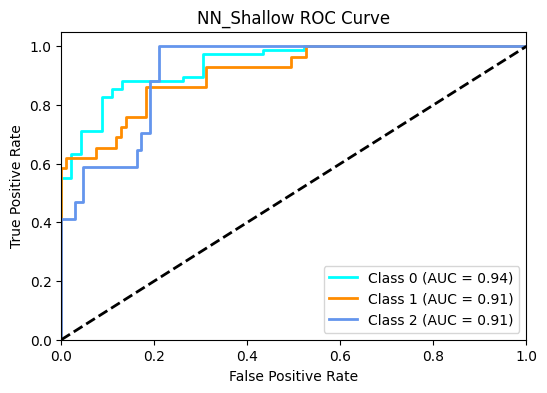

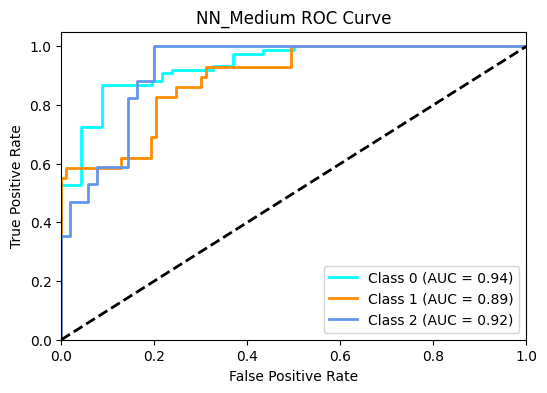

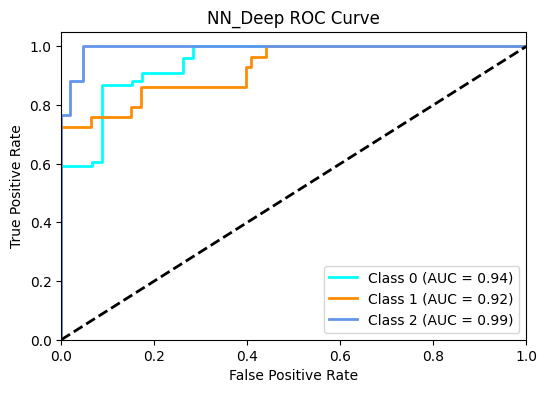

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the validation labels
y_val_bin = label_binarize(y_val, classes=np.unique(y_train))
n_classes = y_val_bin.shape[1]

# Define fixed colors for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']

# Plot ROC curves for each model
for name, model in trained_models.items():
    print(f"Plotting ROC for {name}...")
    y_score = model.predict(X_val_scaled)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 4))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")